In [1]:
import sqlite3

connection = sqlite3.connect('student_grades.db')
print("studnet_grades.db created and connected!")

studnet_grades.db created and connected!


In [7]:
cursor = connection.cursor()
print("Cursor created!")

Cursor created!


In [45]:
cursor.close ()

print("Cursor closed!")

Cursor closed!


In [49]:
cursor = connection.cursor()

print("cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT
)
''')

print("Students table created!")

cursor created!
Students table created!


In [72]:
cursor.execute('DROP TABLE IF EXISTS grades')
connection.commit()
print("Old grades table dropped!")

Old grades table dropped!


In [74]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY(student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [55]:
student_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?,?)
''', student_data)

connection.commit()

print("Data inserted into the students table!")


Data inserted into the students table!


In [76]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?,?,?)
''', grades_data)

connection.commit()

print("Data inserted into the grades table!")


Data inserted into the grades table!


In [82]:
cursor.execute ("SELECT * FROM students")
rows = cursor.fetchall()

print("All students data:")
for row in rows:
    print(row) 

All students data:
(1, 'Alice', 'Johnson')
(2, 'Bob', 'Smith')
(3, 'Carol', 'White')
(4, 'David', 'Brown')
(5, 'Eve', 'Davis')


In [84]:
cursor.execute ("SELECT * FROM grades")
rows = cursor.fetchall()

print("All grades data:")
for row in rows:
    print(row) 

All grades data:
(1, 1, 'Math', 95)
(2, 1, 'English', 88)
(3, 1, 'History', 90)
(4, 2, 'Math', 82)
(5, 2, 'English', 76)
(6, 2, 'History', 85)


In [90]:
cursor.execute('''
SELECT AVG(grade) FROM grades
''')
average_grade = cursor.fetchone()[0]

print(f"Average grade for each studnet: {average_grade}")

Average grade for each studnet: 86.0


In [100]:
cursor.execute('''
SELECT first_name, last_name, AVG(grade) AS avg_grade
FROM students s
JOIN grades g ON student_id = student_id
GROUP BY student_id
ORDER BY avg_grade DESC
LIMIT 1
''')

row = cursor.fetchone()

print(f"Student with the highest average grade: {row[0]} {row[1]} with an average grade of {row[2]}")



Student with the highest average grade: Alice Johnson with an average grade of 91.0


In [102]:
cursor.execute('''
SELECT AVG(grade) 
FROM grades
WHERE subject = 'Math'
''')

average_math_grade = cursor.fetchone()[0]

print(f"Average grade for the Math subject: {average_math_grade}")


Average grade for the Math subject: 88.5


In [106]:
cursor.execute('''
SELECT first_name, last_name, subject, grade
FROM students 
JOIN grades ON student_id = student_id
WHERE grade > 90
''')

rows = cursor.fetchall()

print("Students who scored above 90 in any subject:")
for row in rows:
    print(f"{row[0]} {row[1]} scored {row[3]} in {row[2]}")


Students who scored above 90 in any subject:
Alice Johnson scored 95 in Math
Bob Smith scored 95 in Math
Carol White scored 95 in Math
David Brown scored 95 in Math
Eve Davis scored 95 in Math


In [177]:
import pandas as pd

df = pd.read_sql_query('SELECT * FROM students', connection)

df.head()

,studnet_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [179]:
import pandas as pd

df = pd.read_sql_query('SELECT * FROM grades', connection)

df.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [193]:
cursor.execute('''
SELECT student_id, first_name, last_name, subject, grade
FROM students 
JOIN grades ON student_id = student_id
''')

rows = cursor.fetchall()

print("Students with grades:")
for row in rows:
    print(f"Student ID: {row[0]}, Name: {row[1]} {row[2]}, Subject: {row[3]}, Grade: {row[4]}")



Students with grades:
Student ID: 1, Name: Alice Johnson, Subject: Math, Grade: 95
Student ID: 1, Name: Bob Smith, Subject: Math, Grade: 95
Student ID: 1, Name: Carol White, Subject: Math, Grade: 95
Student ID: 1, Name: David Brown, Subject: Math, Grade: 95
Student ID: 1, Name: Eve Davis, Subject: Math, Grade: 95
Student ID: 1, Name: Alice Johnson, Subject: English, Grade: 88
Student ID: 1, Name: Bob Smith, Subject: English, Grade: 88
Student ID: 1, Name: Carol White, Subject: English, Grade: 88
Student ID: 1, Name: David Brown, Subject: English, Grade: 88
Student ID: 1, Name: Eve Davis, Subject: English, Grade: 88
Student ID: 1, Name: Alice Johnson, Subject: History, Grade: 90
Student ID: 1, Name: Bob Smith, Subject: History, Grade: 90
Student ID: 1, Name: Carol White, Subject: History, Grade: 90
Student ID: 1, Name: David Brown, Subject: History, Grade: 90
Student ID: 1, Name: Eve Davis, Subject: History, Grade: 90
Student ID: 2, Name: Alice Johnson, Subject: Math, Grade: 82
Student 

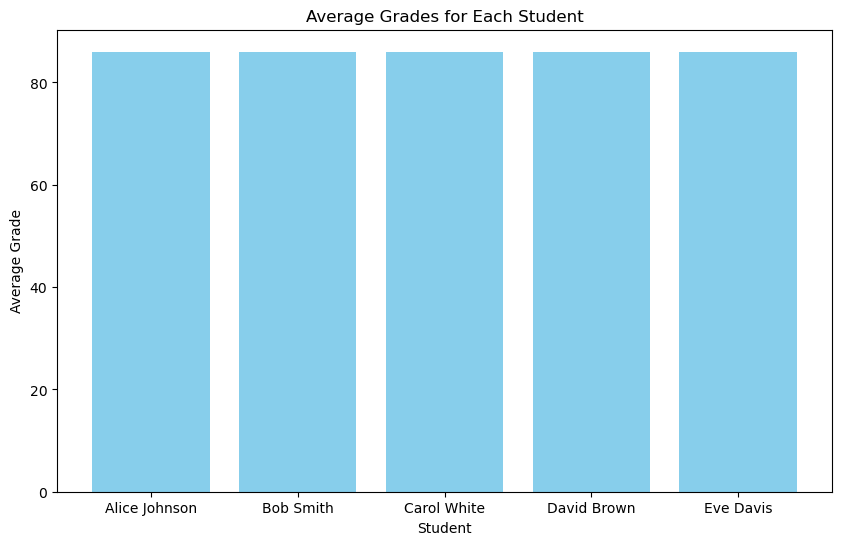

In [213]:
import matplotlib.pyplot as plt
import numpy as np

cursor.execute('''
SELECT first_name, last_name, AVG(grade) 
FROM students 
JOIN grades ON student_id = student_id
GROUP BY first_name
''')

student_data = cursor.fetchall()

student_names = [f"{row[0]} {row[1]}" for row in student_data]
average_grades = [row[2] for row in student_data]

plt.figure(figsize=(10, 6))
plt.bar(student_names, average_grades, color='skyblue')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()


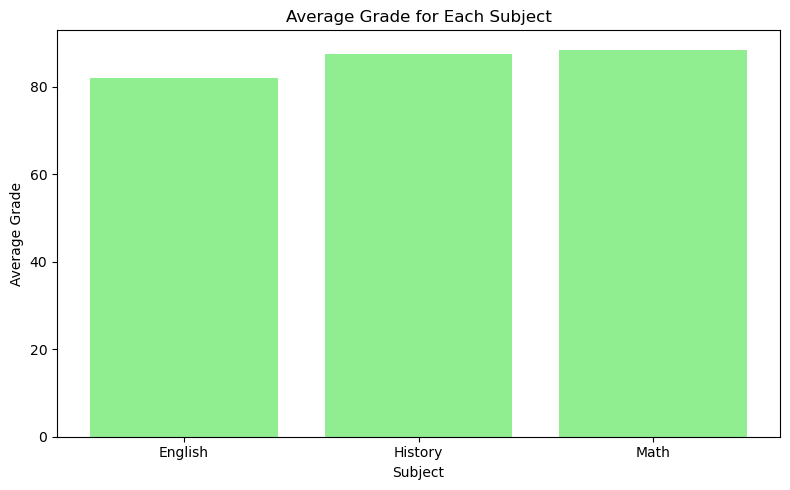

In [215]:
cursor.execute('''
SELECT subject, AVG(grade) AS avg_grade
FROM grades
GROUP BY subject
''')

subject_data = cursor.fetchall()


subjects = [row[0] for row in subject_data]
average_grades_per_subject = [row[1] for row in subject_data]


plt.figure(figsize=(8, 5))
plt.bar(subjects, average_grades_per_subject, color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.tight_layout()
plt.show()


In [217]:
cursor.execute('''
SELECT first_name, last_name, subject, MAX(grade)
FROM students 
JOIN grades ON student_id = student_id
GROUP BY subject
ORDER BY subject
''')


top_students = cursor.fetchall()


print("Top students in each subject:")
for row in top_students:
    print(f"Subject: {row[2]}, Student: {row[0]} {row[1]}, Highest Grade: {row[3]}")


Top students in each subject:
Subject: English, Student: Alice Johnson, Highest Grade: 88
Subject: History, Student: Alice Johnson, Highest Grade: 90
Subject: Math, Student: Alice Johnson, Highest Grade: 95


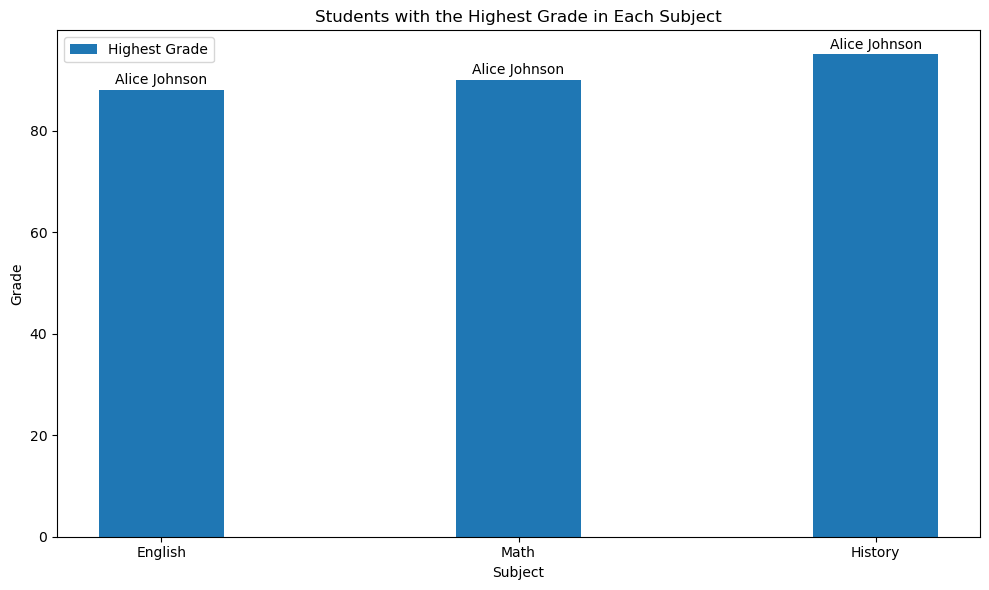

In [219]:
import matplotlib.pyplot as plt
import numpy as np

subjects = [row[2] for row in top_students] 
students = [f"{row[0]} {row[1]}" for row in top_students] 
highest_grades = [row[3] for row in top_students]


unique_subjects = list(set(subjects))


x = np.arange(len(unique_subjects))
width = 0.35 


plt.figure(figsize=(10, 6))

plt.bar(x, highest_grades, width, label='Highest Grade')


plt.xlabel('Subject')
plt.ylabel('Grade')
plt.title('Students with the Highest Grade in Each Subject')
plt.xticks(x, unique_subjects)
plt.legend()

for i, (subject, grade, student) in enumerate(zip(unique_subjects, highest_grades, students)):
    plt.text(i, grade + 0.5, f"{student}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
